# MODELING OF MAGNETIC FIELDS USING PSO ALGORITHM
## ---------------------------
## Modeling Modes Available:
## -1 Dipole
## -2 Dipoles
## -1 Dipole & 1 Quadrupole
## -Comparison
## ---------------------------
### Version 1 - Date 14/06/22
### Author: Víctor Vegas Luque - victorvegas24@gmail.com

# LIBRARIES

In [1]:
# Importo PANDAS: me permite leer los datos directamente del Excel. AS PD sirve para ponerle un alias y hacer el codigo mas legible
import pandas as pd

# Importo NUMPY: una biblioteca que me permite crear matrices y vectores

import numpy as np
from numpy import random
# Importo varias librerias que me pertmiten hacer cosas de matematicas y plots.
import math 
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from plotly.subplots import make_subplots

#We import scipy, which contains functions for complete elliptic integral of the first and second kind. It also contains rotation matrices
import scipy
from scipy import special
#scipy.special.ellipk - First kind
#scipy.special.ellipe - Second kind
from scipy.spatial.transform import Rotation as R

In [2]:
#Para imprimir cadenas en colores
from colorama import Fore, Back, Style

# Python program to print
# colored text and background
class colors:
    
#Colors class:reset all colors with colors.reset; two sub classes fg for foreground
# and bg for background; use as colors.subclass.colorname.
# i.e. colors.fg.red or colors.bg.greenalso, the generic bold, disable,
# underline, reverse, strike through, and invisible work with the main class i.e. colors.bold

    reset='\033[0m'
    bold='\033[01m'
    disable='\033[02m'
    underline='\033[04m'
    reverse='\033[07m'
    strikethrough='\033[09m'
    invisible='\033[08m'
    class fg:
        black='\033[30m'
        red='\033[31m'
        green='\033[32m'
        orange='\033[33m'
        blue='\033[34m'
        purple='\033[35m'
        cyan='\033[36m'
        lightgrey='\033[37m'
        darkgrey='\033[90m'
        lightred='\033[91m'
        lightgreen='\033[92m'
        yellow='\033[93m'
        lightblue='\033[94m'
        pink='\033[95m'
        lightcyan='\033[96m'
    class bg:
        black='\033[40m'
        red='\033[41m'
        green='\033[42m'
        orange='\033[43m'
        blue='\033[44m'
        purple='\033[45m'
        cyan='\033[46m'
        lightgrey='\033[47m'


In [3]:
from PSO_python import Enjambre
from PSO_python import Particula

# READING THE DATA

In [4]:
#Identificamos el archivo donde estan nuestros datos el excel
Data_File=".\Data_IN_ESA\Filter_wheel_25cm.xlsx"

In [5]:
#Vamos a leer las posicionesde los magnetometros directamente del excel
#Para leer el excel usamos read.excel(NOMBRE DEL ARCHIVO DESIGNADO ANTES) de PANDA
#Parametros adicionales:
#sheet_name=0,1,2... para indicar el numero de la 'pagina' del excel en la que se encuentran nuestros datos. También valdría poner "NOMBRE_PAGINA".
#skiprows=0,1,2... para indicar el numero de lineas que me salto. También se puede especificar las páginas que me salto indicandolo cocmo [1,4,27,...]
#nrows=0,1,2 para indicar el numero de lineas que leo
#usecols=3,4,5 para indicar las columnas que leo. También se puede poner com "C,D,E".
#header=0 para leer un cabezero. =None para no ponerlo
pos_mag2=pd.read_excel(Data_File,header=None,sheet_name=0,skiprows=35,nrows=1,usecols=[2,3,4])
pos_mag3=pd.read_excel(Data_File,header=None,sheet_name=0,skiprows=35,nrows=1,usecols=[5,6,7])
pos_mag4=pd.read_excel(Data_File,header=None,sheet_name=0,skiprows=35,nrows=1,usecols=[8,9,10])

print(Fore.RED +colors.bold + "Posición del Magnetómetro 2=" + str( pos_mag2.loc[0].unique())+ " cm"+ colors.reset )
print(Fore.BLUE +colors.bold + "Posición del Magnetómetro 3=" + str( pos_mag3.loc[0].unique())+ " cm"+ colors.reset )
print(Fore.GREEN +colors.bold + "Posición del Magnetómetro 4=" + str( pos_mag4.loc[0].unique())+ " cm"+ colors.reset )

#A pesar de que los magnetometros se encuentran siempre en las mismas posiciones, dentro del propio magnetometro el campo magnetico en cada
#dirección se mide en posiciones ligeramente distintas. Estas diferencias en las posiciones de medidas se encuentran a lo largo del eje mayor
#del magnetometro (Eje Z en la imagen).
#En el caso del magnetometro 2 y 3 , colocados en vertical, coincide con el eje Z; sin embargo el magnetomegro 4 al estar en horizontal
#las diferentes medidas se llevan a cabo a lo largo del eje X.

ref_hole2=pd.read_excel(Data_File,header=None,sheet_name=0,skiprows=36,nrows=3,usecols=[2,3,4])
ref_hole3=pd.read_excel(Data_File,header=None,sheet_name=0,skiprows=36,nrows=3,usecols=[5,6,7])
ref_hole4=pd.read_excel(Data_File,header=None,sheet_name=0,skiprows=36,nrows=3,usecols=[8,9,10])



Posición del Magnetómetro 2=[26.7 -5.4 13.5] cm
Posición del Magnetómetro 3=[26.7  0.   3.5] cm
Posición del Magnetómetro 4=[22.4 -5.4 -9.7] cm


In [6]:
#Ahora mismo tenemos los datos en variables datafile, sin embargo nos interesa tenerlos en formato numpy, ya que es mas facil trabajar con ellos

#.to.numpy pasa de un datafile a una matriz. Al poner [0] al final se toma la primera fila, y queda por lo tanto un array
array_pos_mag2=pos_mag2.to_numpy()[0]
array_pos_mag3=pos_mag3.to_numpy()[0]
array_pos_mag4=pos_mag4.to_numpy()[0]

array_ref_hole2=ref_hole2.to_numpy()
array_ref_hole3=ref_hole3.to_numpy()
array_ref_hole4=ref_hole4.to_numpy()


print(Fore.RED +colors.bold + "Posición del Magnetómetro 2=" + str(array_pos_mag2)+ " cm"+ colors.reset )
print(Fore.BLUE +colors.bold + "Posición del Magnetómetro 3=" + str(array_pos_mag3)+ " cm"+ colors.reset )
print(Fore.GREEN +colors.bold + "Posición del Magnetómetro 4=" + str(array_pos_mag4)+ " cm"+ colors.reset )


Posición del Magnetómetro 2=[26.7 -5.4 13.5] cm
Posición del Magnetómetro 3=[26.7  0.   3.5] cm
Posición del Magnetómetro 4=[22.4 -5.4 -9.7] cm


In [7]:
#Leemos los valores medidios experimetalmente del excel
data_magnetometro2_meas=pd.read_excel(Data_File,header=None,sheet_name=2,skiprows=3,usecols=[1,2,4,6,8])
data_magnetometro3_meas=pd.read_excel(Data_File,header=None,sheet_name=3,skiprows=3,usecols=[1,2,4,6,8])
data_magnetometro4_meas=pd.read_excel(Data_File,header=None,sheet_name=4,skiprows=3,usecols=[1,2,4,6,8])
#Los pasamos a arrays
array_data_magnetometro2_meas=data_magnetometro2_meas.to_numpy()
array_data_magnetometro3_meas=data_magnetometro3_meas.to_numpy()
array_data_magnetometro4_meas=data_magnetometro4_meas.to_numpy()

#Tambien leemos los datos teoricos de la ESA

data_magnetometro2_teo=pd.read_excel(Data_File,header=None,sheet_name=2,skiprows=3,usecols=[1,3,5,7,9])
data_magnetometro3_teo=pd.read_excel(Data_File,header=None,sheet_name=3,skiprows=3,usecols=[1,3,5,7,9])
data_magnetometro4_teo=pd.read_excel(Data_File,header=None,sheet_name=4,skiprows=3,usecols=[1,3,5,7,9])

#Los pasamos a arrays
array_data_magnetometro2_teo=data_magnetometro2_teo.to_numpy()
array_data_magnetometro3_teo=data_magnetometro3_teo.to_numpy()
array_data_magnetometro4_teo=data_magnetometro4_teo.to_numpy()

In [8]:
#Leemos del array los valores para cada componente del campo magnetico.[:,x] me indica que tomamos los valores de la columna x para todas las filas
Bx_magnetometer2_meas=array_data_magnetometro2_meas[:,1]
By_magnetometer2_meas=array_data_magnetometro2_meas[:,2]
Bz_magnetometer2_meas=array_data_magnetometro2_meas[:,3]

Bx_magnetometer3_meas=array_data_magnetometro3_meas[:,1]
By_magnetometer3_meas=array_data_magnetometro3_meas[:,2]
Bz_magnetometer3_meas=array_data_magnetometro3_meas[:,3]


Bx_magnetometer4_meas=array_data_magnetometro4_meas[:,1]
By_magnetometer4_meas=array_data_magnetometro4_meas[:,2]
Bz_magnetometer4_meas=array_data_magnetometro4_meas[:,3]

Bx_meas=np.array([Bx_magnetometer2_meas,Bx_magnetometer3_meas,Bx_magnetometer4_meas])/(10**9)
By_meas=np.array([By_magnetometer2_meas,By_magnetometer3_meas,By_magnetometer4_meas])/(10**9)
Bz_meas=np.array([Bz_magnetometer2_meas,Bz_magnetometer3_meas,Bz_magnetometer4_meas])/(10**9)





Bx_magnetometer2_teo=array_data_magnetometro2_teo[:,1]
By_magnetometer2_teo=array_data_magnetometro2_teo[:,2]
Bz_magnetometer2_teo=array_data_magnetometro2_teo[:,3]

Bx_magnetometer3_teo=array_data_magnetometro3_teo[:,1]
By_magnetometer3_teo=array_data_magnetometro3_teo[:,2]
Bz_magnetometer3_teo=array_data_magnetometro3_teo[:,3]


Bx_magnetometer4_teo=array_data_magnetometro4_teo[:,1]
By_magnetometer4_teo=array_data_magnetometro4_teo[:,2]
Bz_magnetometer4_teo=array_data_magnetometro4_teo[:,3]


print(Fore.RED +colors.bold + "Campo magnetico X Magnetometro 2 Medido=\n" + str(Bx_magnetometer2_meas)+ " [nT]"+ colors.reset )
print(Fore.BLUE +colors.bold + "Campo magnetico X Magnetometro 3 Medido=\n" + str(Bx_magnetometer3_meas)+ " [nT]"+ colors.reset )
print(Fore.GREEN +colors.bold + "Campo magnetico X Magnetometro 4 Medido=\n" + str(Bx_magnetometer4_meas)+ " [nT]"+ colors.reset )

Campo magnetico X Magnetometro 2 Medido=
[ 33.8  34.2  34.7  34.6  34.5  34.8  35.3  35.6  36.   36.6  36.6  36.4
  36.7  36.5  36.1  36.   36.3  36.5  36.3  36.5  36.7  36.8  36.6  35.9
  35.3  35.   34.7  34.7  34.9  34.8  34.5  34.3  34.2  34.1  33.7  33.7
  33.3  32.4  31.5  30.6  30.3  30.4  30.3  29.9  29.3  28.7  28.4  28.
  27.5  26.9  26.4  26.   25.5  24.8  23.7  22.3  21.9  22.   21.7  20.6
  19.7  19.3  18.4  17.5  16.2  15.4  15.   14.3  13.6  12.7  11.5  10.2
   9.2   8.5   8.    7.2   6.1   5.1   4.3   3.2   1.9   1.1   0.   -1.2
  -2.4  -3.9  -5.4  -6.5  -7.3  -8.4  -9.8 -11.1 -12.6 -14.2 -15.3 -16.7
 -18.4 -20.1 -21.4 -22.8 -24.1 -25.1 -26.8 -29.  -30.5 -32.  -33.5 -35.3
 -37.2 -38.6 -39.7 -40.8 -42.6 -44.5 -46.5 -48.3 -49.8 -51.4 -53.2 -54.7
 -56.2 -57.5 -58.7 -59.8 -61.3 -63.3 -65.3 -66.6 -67.8 -68.9 -70.3 -71.9
 -73.4 -74.3 -75.1 -76.2 -77.4 -78.3 -79.3 -80.5 -81.4 -82.2 -83.  -83.7
 -84.6 -85.2 -85.9 -86.8 -87.5 -87.1 -86.9 -87.3 -87.4 -87.7 -88.6 -89.2
 -89.6 -89.

In [9]:
#THEORICAL ESA:
Bx_ESA=np.array([Bx_magnetometer2_teo,Bx_magnetometer3_teo,Bx_magnetometer4_teo])
By_ESA=np.array([By_magnetometer2_teo,By_magnetometer3_teo,By_magnetometer4_teo])
Bz_ESA=np.array([Bz_magnetometer2_teo,Bz_magnetometer3_teo,Bz_magnetometer4_teo])
#MEASURED:
Bx_meas=np.array([Bx_magnetometer2_meas,Bx_magnetometer3_meas,Bx_magnetometer4_meas])
By_meas=np.array([By_magnetometer2_meas,By_magnetometer3_meas,By_magnetometer4_meas])
Bz_meas=np.array([Bz_magnetometer2_meas,Bz_magnetometer3_meas,Bz_magnetometer4_meas])


In [10]:
#Tambien creamos un array con los angulos, leyendo la primera columna de cualquiera de los arrays creados a partir de los datafile
phi=array_data_magnetometro2_meas[:,0]
#Creamos uno en radianes tambien
phi_rad=phi*math.pi/180

Calculamos los campos magneticos mediante la aproximación dipolar usando las siguientes expresiones

$\textbf{B}_x=\dfrac{\mu_0 }{4\pi}\left(\dfrac{3\left(m_x(x-x_0)+m_y(y-y_0)+m_z(z-z_0)\right)(x-x_0)}{r^5}-\dfrac{m_x}{r^3}\right) $

$\textbf{B}_y=\dfrac{\mu_0 }{4\pi}\left(\dfrac{3\left(m_x(x-x_0)+m_y(y-y_0)+m_z(z-z_0)\right)(y-y_0)}{r^5}-\dfrac{m_y}{r^3}\right) $

$\textbf{B}_z=\dfrac{\mu_0 }{4\pi}\left(\dfrac{3\left(m_x(x-x_0)+m_y(y-y_0)+m_z(z-z_0)\right)(z-z_0)}{r^5}-\dfrac{m_z}{r^3}\right) $

In [11]:
#Definimos la funcion para el calculo del campo magnético a partir de los momentos dipolares

#Como el disco gira alrededor del eje Z, es de especial interes definir una funcioon que nos calcule el campo magnetico en el eje Z y otra
#en el eje X e Y. La razón de esto se explicara despues.
'''
#Funcion que calcula en campo magnetico en todas las direcciones a partir de un dipolo
def B_field(mx,my,mz,x0,y0,z0,X,Y,Z):
    mu=4.0*math.pi*10**(-7.0)
    k=mu/(4.0*math.pi)
    R=np.sqrt((X-x0)**2.0+(Y-y0)**2+(Z-z0)**2)
    mR=mx*(X-x0)+my*(Y-y0)+mz*(Z-z0)
    
    Bx=k*(-(mx/R**3.0)+((3.0*(X-x0)*mR)/R**5.0))
    By=k*(-(my/R**3.0)+((3.0*(Y-y0)*mR)/R**5.0))
    Bz=k*(-(mz/R**3.0)+((3.0*(Z-z0)*mR)/R**5.0))
    
    return Bx,By,Bz
    
'''


def Bx_field(mx,my,mz,x0,y0,z0,X,Y,Z):
    mu=4.0*math.pi*10**(-7.0)
    k=mu/(4.0*math.pi)
    
    R=np.sqrt((X-x0)**2.0+(Y-y0)**2+(Z-z0)**2)
    mR=mx*(X-x0)+my*(Y-y0)+mz*(Z-z0)
    

    Bx=k*(-(mx/R**3.0)+((3.0*(X-x0)*mR)/R**5.0))

    
    return Bx*10**12

def By_field(mx,my,mz,x0,y0,z0,X,Y,Z):
    mu=4.0*math.pi*10**(-7.0)
    k=mu/(4.0*math.pi)
    R=np.sqrt((X-x0)**2.0+(Y-y0)**2+(Z-z0)**2)
    mR=mx*(X-x0)+my*(Y-y0)+mz*(Z-z0)
    

    By=k*(-(my/R**3.0)+((3.0*(Y-y0)*mR)/R**5.0))
    
    return By*10**12

def Bz_field(mx,my,mz,x0,y0,z0,X,Y,Z):
    mu=4.0*math.pi*10**(-7.0)
    k=mu/(4.0*math.pi)
    
    R=np.sqrt((X-x0)**2.0+(Y-y0)**2+(Z-z0)**2)
    mR=mx*(X-x0)+my*(Y-y0)+mz*(Z-z0)
    

    Bz=k*(-(mz/R**3.0)+((3.0*(Z-z0)*mR)/R**5.0))
    
    return Bz*10**12

In [12]:
def Bxyz_UnDip(x0_d1,y0_d1,z0_d1,mx_d1,my_d1,mz_d1):


    
    Bx_test_X=Bx_field(mx_d1,my_d1,mz_d1,x0_d1,y0_d1,z0_d1,X[0],Y[0],Z[0])
    By_test_X=By_field(mx_d1,my_d1,mz_d1,x0_d1,y0_d1,z0_d1,X[0],Y[0],Z[0])
    
    
    Bx_test_Y=Bx_field(mx_d1,my_d1,mz_d1,x0_d1,y0_d1,z0_d1,X[1],Y[1],Z[1])
    By_test_Y=By_field(mx_d1,my_d1,mz_d1,x0_d1,y0_d1,z0_d1,X[1],Y[1],Z[1])
    
    Bz=Bz_field(mx_d1,my_d1,mz_d1,x0_d1,y0_d1,z0_d1,X[2],Y[2],Z[2])
    
    Bx=[[0]*len(Bx_test_X[0])]*3
    By=[[0]*len(Bx_test_X[0])]*3

    
    Bx[0]=Bx_test_X[0]*np.cos(phi_rad)-By_test_X[0]*np.sin(phi_rad)
    Bx[1]=Bx_test_X[1]*np.cos(phi_rad)-By_test_X[1]*np.sin(phi_rad)
    Bx[2]=Bx_test_X[2]*np.cos(phi_rad)-By_test_X[2]*np.sin(phi_rad)
    
    By[0]=Bx_test_Y[0]*np.sin(phi_rad)+By_test_Y[0]*np.cos(phi_rad)
    By[1]=Bx_test_Y[1]*np.sin(phi_rad)+By_test_Y[1]*np.cos(phi_rad)
    By[2]=Bx_test_Y[2]*np.sin(phi_rad)+By_test_Y[2]*np.cos(phi_rad)
    return Bx,By,Bz

In [13]:
#Calculamos los campos magneticos usando las funciones antes definida
#Como tenemos dos dipolos, primeramente calculamos los campos magneticos generados por cada uno por separados y luego los sumamos
#El eje Z no cambia a pesar de que el disco gire, sin embargo los ejes X e Y del disco si que giran respecto a los del magnetoemtro
#Lo que vamos a hacer es calcular el campo magnetico considerando que nuestro disco no gira, y luego proyectaremos adecuadamente sobre los ejes de cada magnetometr

def Bxyz_DosDip(x0_d1,y0_d1,z0_d1,mx_d1,my_d1,mz_d1,x0_d2,y0_d2,z0_d2,mx_d2,my_d2,mz_d2):


    
    Bx_test_X=Bx_field(mx_d1,my_d1,mz_d1,x0_d1,y0_d1,z0_d1,X[0],Y[0],Z[0])
    By_test_X=By_field(mx_d1,my_d1,mz_d1,x0_d1,y0_d1,z0_d1,X[0],Y[0],Z[0])
    
    Bx_test_X=Bx_test_X+Bx_field(mx_d2,my_d2,mz_d2,x0_d2,y0_d2,z0_d2,X[0],Y[0],Z[0])
    By_test_X=By_test_X+By_field(mx_d2,my_d2,mz_d2,x0_d2,y0_d2,z0_d2,X[0],Y[0],Z[0])
    
    
    Bx_test_Y=Bx_field(mx_d1,my_d1,mz_d1,x0_d1,y0_d1,z0_d1,X[1],Y[1],Z[1])
    By_test_Y=By_field(mx_d1,my_d1,mz_d1,x0_d1,y0_d1,z0_d1,X[1],Y[1],Z[1])
    
    Bx_test_Y=Bx_test_Y+Bx_field(mx_d2,my_d2,mz_d2,x0_d2,y0_d2,z0_d2,X[1],Y[1],Z[1])
    By_test_Y=By_test_Y+By_field(mx_d2,my_d2,mz_d2,x0_d2,y0_d2,z0_d2,X[1],Y[1],Z[1])
    
    Bz=Bz_field(mx_d1,my_d1,mz_d1,x0_d1,y0_d1,z0_d1,X[2],Y[2],Z[2])
    

    Bz=Bz+Bz_field(mx_d2,my_d2,mz_d2,x0_d2,y0_d2,z0_d2,X[2],Y[2],Z[2])
    
    Bx=[[0]*len(Bx_test_X[0])]*3
    By=[[0]*len(Bx_test_X[0])]*3

    
    Bx[0]=Bx_test_X[0]*np.cos(phi_rad)-By_test_X[0]*np.sin(phi_rad)
    Bx[1]=Bx_test_X[1]*np.cos(phi_rad)-By_test_X[1]*np.sin(phi_rad)
    Bx[2]=Bx_test_X[2]*np.cos(phi_rad)-By_test_X[2]*np.sin(phi_rad)
    
    By[0]=Bx_test_Y[0]*np.sin(phi_rad)+By_test_Y[0]*np.cos(phi_rad)
    By[1]=Bx_test_Y[1]*np.sin(phi_rad)+By_test_Y[1]*np.cos(phi_rad)
    By[2]=Bx_test_Y[2]*np.sin(phi_rad)+By_test_Y[2]*np.cos(phi_rad)
    return Bx,By,Bz

# MAGNETIC FIELD CREATED BY A SPIRE

Field components:

\begin{equation}
B_x=\frac{Cxz}{2\alpha^2\beta\rho^2}\left[(a^2+r^2)E(k^2)-\alpha^2 K(k^2)\right] 
\end{equation}

\begin{equation}
B_y=\frac{Cyz}{2\alpha^2\beta\rho^2}\left[(a^2+r^2)E(k^2)-\alpha^2 K(k^2)\right] 
\end{equation}

\begin{equation}
B_z=\frac{C}{2\alpha^2\beta}\left[(a^2-r^2)E(k^2)+ \alpha^2 K(k^2)\right]
\end{equation}

\begin{equation}
\rho^2 \equiv x^2+y^2 \ \ ; \ \ r^2\equiv x^2+y^2+z^2 \ \ ; \ \ \alpha^2\equiv a^2+r^2-2a\rho
\end{equation}

\begin{equation}
\beta^2\equiv a^2+r^2+2a\rho \ \ ; \ \ k^2 \equiv 1-\alpha^2/\beta^2 \ \ ; \ \ \gamma^2\equiv x^2-y^2
\end{equation}

In [14]:

def rho_square(X,Y):
    rho_square=X*X+Y*Y
    return rho_square
def r_square(X,Y,Z):
    r_square=X*X+Y*Y+Z*Z
    return r_square

    
def alpha_square(radius,X,Y,Z):
    alpha_square=radius*radius+r_square(X,Y,Z)-2*radius*(np.sqrt(rho_square(X,Y)))
    return alpha_square
def beta_square(radius,X,Y,Z):
    beta_square=radius*radius+r_square(X,Y,Z)+2*radius*(np.sqrt(rho_square(X,Y)))
    return beta_square
def k_square(radius,X,Y,Z):
    k_square=1-(alpha_square(radius,X,Y,Z)/beta_square(radius,X,Y,Z))
    return k_square
def gamma_square(X,Y):
    gamma_square=X*X-Y*Y
    return gamma_square

In [15]:

def Bx_spire(I,radius,X,Y,Z):
    C=mu=4.0*I*10**(-7.0)
    Bx=C*X*Z*((radius*radius+r_square(X,Y,Z))*scipy.special.ellipe(k_square(radius,X,Y,Z))-(alpha_square(radius,X,Y,Z))*scipy.special.ellipk(k_square(radius,X,Y,Z)))/(2*(alpha_square(radius,X,Y,Z))*np.sqrt(beta_square(radius,X,Y,Z))*rho_square(X,Y))
    
    return Bx

def By_spire(I,radius,X,Y,Z):
    C=mu=4.0*I*10**(-7.0)
    By=C*Y*Z*((radius*radius+r_square(X,Y,Z))*scipy.special.ellipe(k_square(radius,X,Y,Z))-(alpha_square(radius,X,Y,Z))*scipy.special.ellipk(k_square(radius,X,Y,Z)))/(2*(alpha_square(radius,X,Y,Z))*np.sqrt(beta_square(radius,X,Y,Z))*rho_square(X,Y))
    
    return By

def Bz_spire(I,radius,X,Y,Z):
    C=mu=4.0*I*10**(-7.0)
    Bz=C*((radius*radius-r_square(X,Y,Z))*scipy.special.ellipe(k_square(radius,X,Y,Z))+(alpha_square(radius,X,Y,Z))*scipy.special.ellipk(k_square(radius,X,Y,Z)))/(2*(alpha_square(radius,X,Y,Z))*np.sqrt(beta_square(radius,X,Y,Z)))
    return Bz

In [16]:
def B_quad(I,radius,x_0,y_0,z_0,phi,theta,X,Y,Z):
    r=R.from_euler('xz',[[theta,phi]], degrees=True)
    r_matrix=r.as_matrix()[0]
    r_matrix_inverse=np.linalg.inv(r_matrix)
    OFFSET_1=np.tensordot(r_matrix,np.array([0,0,radius]),axes=1)
    OFFSET_2=np.tensordot(r_matrix,np.array([0,0,-radius]),axes=1)
    
    OFFSET_1=OFFSET_1+[x_0,y_0,z_0]
    OFFSET_2=OFFSET_2+[x_0,y_0,z_0]

    
    
    X_1_OFFSET=X-OFFSET_1[0]*np.ones_like(X)
    Y_1_OFFSET=Y-OFFSET_1[1]*np.ones_like(Y)
    Z_1_OFFSET=Z-OFFSET_1[2]*np.ones_like(Z)
    
    X_2_OFFSET=X-OFFSET_2[0]*np.ones_like(X)
    Y_2_OFFSET=Y-OFFSET_2[1]*np.ones_like(Y)
    Z_2_OFFSET=Z-OFFSET_2[2]*np.ones_like(Z)
    
    COORD_1_OFFSET=[X_1_OFFSET,Y_1_OFFSET,Z_1_OFFSET]
    COORD_2_OFFSET=[X_2_OFFSET,Y_2_OFFSET,Z_2_OFFSET]
    
    COORD_1_OFFSET_ROT=np.tensordot(r_matrix_inverse,np.array(COORD_1_OFFSET),axes=1)
    COORD_2_OFFSET_ROT=np.tensordot(r_matrix_inverse,np.array(COORD_2_OFFSET),axes=1)
    
    Bx_1_ROT=Bx_spire(I,radius,COORD_1_OFFSET_ROT[0],COORD_1_OFFSET_ROT[1],COORD_1_OFFSET_ROT[2])
    By_1_ROT=By_spire(I,radius,COORD_1_OFFSET_ROT[0],COORD_1_OFFSET_ROT[1],COORD_1_OFFSET_ROT[2])
    Bz_1_ROT=Bz_spire(I,radius,COORD_1_OFFSET_ROT[0],COORD_1_OFFSET_ROT[1],COORD_1_OFFSET_ROT[2])
    
    Bx_2_ROT=Bx_spire(-I,radius,COORD_2_OFFSET_ROT[0],COORD_2_OFFSET_ROT[1],COORD_2_OFFSET_ROT[2])
    By_2_ROT=By_spire(-I,radius,COORD_2_OFFSET_ROT[0],COORD_2_OFFSET_ROT[1],COORD_2_OFFSET_ROT[2])
    Bz_2_ROT=Bz_spire(-I,radius,COORD_2_OFFSET_ROT[0],COORD_2_OFFSET_ROT[1],COORD_2_OFFSET_ROT[2])


    Bx_quad_ROT=Bx_1_ROT+Bx_2_ROT
    By_quad_ROT=By_1_ROT+By_2_ROT
    Bz_quad_ROT=Bz_1_ROT+Bz_2_ROT

    B_quad_ROT=np.array([Bx_quad_ROT,By_quad_ROT,Bz_quad_ROT])
    B_quad=np.tensordot(r_matrix,np.array(B_quad_ROT),axes=1)
    return B_quad*10**(11)

In [17]:
def Bxyz_1Dip1Quad(x0_d1,y0_d1,z0_d1,mx_d1,my_d1,mz_d1,a,I,px0,py0,pz0,phi0,theta0):


    
    Bx_test_X=Bx_field(mx_d1,my_d1,mz_d1,x0_d1,y0_d1,z0_d1,X[0],Y[0],Z[0])
    By_test_X=By_field(mx_d1,my_d1,mz_d1,x0_d1,y0_d1,z0_d1,X[0],Y[0],Z[0])
    
    Bx_test_X=Bx_test_X+B_quad(a,I,px0,py0,pz0,phi0,theta0,X[0],Y[0],Z[0])[0]
    By_test_X=By_test_X+B_quad(a,I,px0,py0,pz0,phi0,theta0,X[0],Y[0],Z[0])[1]
    
    
    
    Bx_test_Y=Bx_field(mx_d1,my_d1,mz_d1,x0_d1,y0_d1,z0_d1,X[1],Y[1],Z[1])
    By_test_Y=By_field(mx_d1,my_d1,mz_d1,x0_d1,y0_d1,z0_d1,X[1],Y[1],Z[1])
    
    Bx_test_Y=Bx_test_Y+B_quad(a,I,px0,py0,pz0,phi0,theta0,X[1],Y[1],Z[1])[0]
    By_test_Y=By_test_Y+B_quad(a,I,px0,py0,pz0,phi0,theta0,X[1],Y[1],Z[1])[1]
    
    Bz=Bz_field(mx_d1,my_d1,mz_d1,x0_d1,y0_d1,z0_d1,X[2],Y[2],Z[2])
    
    Bz=Bz+B_quad(a,I,px0,py0,pz0,phi0,theta0,X[2],Y[2],Z[2])[2]
    
    Bx=[[0]*len(Bx_test_X[0])]*3
    By=[[0]*len(Bx_test_X[0])]*3

    
    Bx[0]=Bx_test_X[0]*np.cos(phi_rad)-By_test_X[0]*np.sin(phi_rad)
    Bx[1]=Bx_test_X[1]*np.cos(phi_rad)-By_test_X[1]*np.sin(phi_rad)
    Bx[2]=Bx_test_X[2]*np.cos(phi_rad)-By_test_X[2]*np.sin(phi_rad)
    
    By[0]=Bx_test_Y[0]*np.sin(phi_rad)+By_test_Y[0]*np.cos(phi_rad)
    By[1]=Bx_test_Y[1]*np.sin(phi_rad)+By_test_Y[1]*np.cos(phi_rad)
    By[2]=Bx_test_Y[2]*np.sin(phi_rad)+By_test_Y[2]*np.cos(phi_rad)
    return Bx,By,Bz

In [18]:
#Respecto al sistema de referencia del disco, los magnetometros describen una trayectoria circular alrededor del eje Z.
#Creamos una funcion para crear una array con todas las posiciones que toman los magnetometros respecto al sistema de referencia del disco.

def XYZ (pos_mag,ref_hole):
#Definimos las coordenadas en el instante inicial
    X0,Y0,Z0=pos_mag+ref_hole
    
    
    R=np.sqrt(X0**2.0+Y0**2.0+Z0**2.0)
    theta=math.acos(Z0/(R))
    phi=math.atan(Y0/X0)
    
    X=R*np.sin(theta)*np.cos(-phi_rad+phi)
    Y=R*np.sin(theta)*np.sin(-phi_rad+phi)
    Z=R*np.cos(theta)
    

    return X,Y,Z

In [19]:
#Leemos las caracteristicas de los dos dipolos

Dipolo1=pd.read_excel(Data_File,header=None,sheet_name=5,skiprows=7,nrows=1,usecols=np.r_[1:7])

array_Dipolo1=Dipolo1.to_numpy()

x0_1=array_Dipolo1[0][0]
y0_1=array_Dipolo1[0][1]
z0_1=array_Dipolo1[0][2]

mx_1=array_Dipolo1[0][3]
my_1=array_Dipolo1[0][4]
mz_1=array_Dipolo1[0][5]

Dipolo2=pd.read_excel(Data_File,header=None,sheet_name=5,skiprows=8,nrows=1,usecols=np.r_[1:7])

array_Dipolo2=Dipolo2.to_numpy()

x0_2=array_Dipolo2[0][0]
y0_2=array_Dipolo2[0][1]
z0_2=array_Dipolo2[0][2]

mx_2=array_Dipolo2[0][3]
my_2=array_Dipolo2[0][4]
mz_2=array_Dipolo2[0][5]


In [20]:
# Imprimimos los datos de los Dipolos obtenidos por la ESA
print(Fore.RED +colors.bold + "Dipolo 1=" + "(X0,Y0,Z0)=("+str(x0_1)+","+str(y0_1)+","+str(z0_1)+") [cm]"+ 
      "    -  (Mx,My,Mx)=("+str(mx_1)+","+str(my_1)+","+str(mz_1)+")  [A/m]"+ 
      colors.reset )

print(Fore.BLUE +colors.bold + "Dipolo 2=" + "(X0,Y0,Z0)=("+str(x0_2)+","+str(y0_2)+","+str(z0_2)+") [cm]"+ 
      "    -  (Mx,My,Mx)=("+str(mx_2)+","+str(my_2)+","+str(mz_2)+")  [A/m]"+ 
      colors.reset )

Dipolo 1=(X0,Y0,Z0)=(-3.9,-2.1,6.2) [cm]    -  (Mx,My,Mx)=(3.411,-0.302,-6.417)  [A/m]
Dipolo 2=(X0,Y0,Z0)=(3.8,2.7,2.1) [cm]    -  (Mx,My,Mx)=(1.713,-4.715,-2.43)  [A/m]


In [21]:

#COORDINATES:
#Notation: COORDINATE_MAGNETOMETER_FIELD DIRECTION

X_2_X,Y_2_X,Z_2_X=XYZ(array_pos_mag2,array_ref_hole2[0])
X_3_X,Y_3_X,Z_3_X=XYZ(array_pos_mag3,array_ref_hole3[0])
X_4_X,Y_4_X,Z_4_X=XYZ(array_pos_mag4,array_ref_hole4[0])

X_2_Y,Y_2_Y,Z_2_Y=XYZ(array_pos_mag2,array_ref_hole2[1])
X_3_Y,Y_3_Y,Z_3_Y=XYZ(array_pos_mag3,array_ref_hole3[1])
X_4_Y,Y_4_Y,Z_4_Y=XYZ(array_pos_mag4,array_ref_hole4[1])

X_2_Z,Y_2_Z,Z_2_Z=XYZ(array_pos_mag2,array_ref_hole2[2])
X_3_Z,Y_3_Z,Z_3_Z=XYZ(array_pos_mag3,array_ref_hole3[2])
X_4_Z,Y_4_Z,Z_4_Z=XYZ(array_pos_mag4,array_ref_hole4[2])


#We group by coordinates (Notation:COORDINATE_FIELD DIRECTION):


X_X=np.array([X_2_X,X_3_X,X_4_X])
Y_X=np.array([Y_2_X,Y_3_X,Y_4_X])
Z_X=np.array([[Z_2_X]*len(X_2_X),[Z_3_X]*len(X_2_X),[Z_4_X]*len(X_2_X)])


X_Y=np.array([X_2_Y,X_3_Y,X_4_Y])
Y_Y=np.array([Y_2_Y,Y_3_Y,Y_4_Y])
Z_Y=np.array([[Z_2_Y]*len(X_2_X),[Z_3_Y]*len(X_2_X),[Z_4_Y]*len(X_2_X)])

X_Z=np.array([X_2_Z,X_3_Z,X_4_Z])
Y_Z=np.array([Y_2_Z,Y_3_Z,Y_4_Z])
Z_Z=np.array([[Z_2_Z]*len(X_2_X),[Z_3_Z]*len(X_2_X),[Z_4_Z]*len(X_2_X)])
#Now we group by measure direction:
X=[X_X,X_Y,X_Z]
Y=[Y_X,Y_Y,Y_Z]
Z=[Z_X,Z_Y,Z_Z]

#Finally, we group them in a single matrix
COORD=[X,Y,Z]

#This way we can easily access all of the coordiantes we've group. 
#Example: coord[0][1][2] gives ous the coordinates on the X axis when we want to measure the field on the Y direction for the 4th magnetometer

# BASIC FITNESS FUNCTIONS

We define the two fitness functions used in this program to optimize our values calculated with the PSO:

 -Fitness Function 1: 

$F_1=\dfrac{\sqrt{\sum_{i=0}^{M-1}\left[\left(B_{x}^{(meas)}\left[i\right]-B_{x}^{(PSO)}\left[i\right]\right)^2+\left(B_{y}^{(meas)}\left[i\right]-B_{y}^{(PSO)}\left[i\right]\right)^2+\left(B_{z}^{(meas)}\left[i\right]-B_{z}^{(PSO)}\left[i\right]\right)^2\right]}}{\sqrt{\sum_{i=0}^{M-1}\left[\left(B_{x}^{(meas)}\left[i\right]\right)^2+\left(B_{y}^{(meas)}\left[i\right]\right)^2+\left(B_{z}^{(meas)}\left[i\right]\right)^2\right]}}$

-Fitness Function 2: 

$F_2=\dfrac{\sum_{i=0}^{M-1}\left(B_{x}^{(meas)}\left[i\right]-B_{x}^{(PSO)}\left[i\right]\right)^2}{\sum_{i=0}^{M-1}\left(B_{x}^{(meas)}\left[i\right]\right)^2}+\dfrac{\sum_{i=0}^{M-1}\left(B_{y}^{(meas)}\left[i\right]-B_{y}^{(PSO)}\left[i\right]\right)^2}{\sum_{i=0}^{M-1}\left(B_{y}^{(meas)}\left[i\right]\right)^2}+\dfrac{\sum_{i=0}^{M-1}\left(B_{z}^{(meas)}\left[i\right]-B_{z}^{(PSO)}\left[i\right]\right)^2}{\sum_{i=0}^{M-1}\left(B_{z}^{(meas)}\left[i\right]\right)^2}$

-Fitness Function: 

$F^{(n)}=F_{2}^{(n)}\left(\dfrac{F_{2}^{(n-1)}}{F_{1}^{(n-1)}}\right)+F_{1}^{(n)}\left(\dfrac{F_{1}^{(n-1)}}{F_{2}^{(n-1)}}\right)$

In [22]:
############################################################################################################################
#FUNCTION: FitnessFunction1
# -) IN variables:
#    # -) Bx_PSO, By_PSO, Bz_PSO: Magnetic field calculated with the dipole approximation calculated with the function Magnetic_Field
#  
# -) OUT variables: 
#    # -) F1: Value of the fitness function 1 calculated with the function shown
############################################################################################################################
def FitnessFunction_F1(Bx_PSO,By_PSO,Bz_PSO):
    
    length=len(Bx_meas[0])    
    sum_num_B=0
    sum_den_B=0
    
    
    for i in range(0,3):
        for j in range(0,length-1):
            sum_num_B=sum_num_B+((Bx_meas[i][j]-Bx_PSO[i][j])**2.0+(By_meas[i][j]-By_PSO[i][j])**2.0+(Bz_meas[i][j]-Bz_PSO[i][j])**2.0)
            sum_den_B=sum_den_B+(Bx_meas[i][j]**2.0+By_meas[i][j]**2.0+Bz_meas[i][j]**2.0)

    F1=np.sqrt(sum_num_B/sum_den_B)
    

    return F1

In [23]:
############################################################################################################################
#FUNCTION: FitnessFunction2
# -) IN variables:
#    # -) Bx_PSO, By_PSO, Bz_PSO: Magnetic field calculated with the dipole approximation calculated with the function Magnetic_Field
#  
# -) OUT variables: 
#    # -) F1: Value of the fitness function 2 calculated with the function shown
############################################################################################################################
def FitnessFunction_F2(Bx_PSO,By_PSO,Bz_PSO):
    
    length=len(Bx_meas[0])
    sum_num_Bx=0
    sum_num_By=0
    sum_num_Bz=0
    sum_den_Bx=0
    sum_den_By=0
    sum_den_Bz=0
    
    for i in range(0,3):
        for j in range(0,length-1):
            sum_num_Bx=sum_num_Bx+(Bx_meas[i][j]-Bx_PSO[i][j])**2.0
            sum_num_By=sum_num_By+(By_meas[i][j]-By_PSO[i][j])**2.0
            sum_num_By=sum_num_By+(Bz_meas[i][j]-Bz_PSO[i][j])**2.0
        
            sum_den_Bx=sum_den_Bx+(Bx_meas[i][j])**2.0
            sum_den_By=sum_den_By+(By_meas[i][j])**2.0
            sum_den_Bz=sum_den_Bz+(Bz_meas[i][j])**2.0
        
    xnum_Bx=sum_num_Bx/sum_den_Bx
    xnum_By=sum_num_By/sum_den_By
    xnum_Bz=sum_num_Bz/sum_den_Bz    
        
    F2=xnum_Bx+xnum_By+xnum_Bz
    

    return F2

# FITNESS FUNCTIONS

# ONE DIPOLE

In [24]:
############################################################################################################################
#FUNCTION: FitnessFunction_Ini
# -) IN variables:
#    # -) x0, y0, z0: Position components calculated with the PSO algorithm.
#    # -) mx, my, mz: Magnetic moments calculated with the PSO algorithm.
#
# -) OUT variables: 
#    # -) F: Initial fitness function value calculated with the function shown to initialize the value.
############################################################################################################################
def FitnessFunction_Ini(x0,y0,z0,mx,my,mz):
    
    global F1_0
    global F2_0
    
    #Starting value for F1_0 and F2_0. THis one could be anything
    F1_0=random.uniform(10, 100)
    F2_0=random.uniform(10, 100)

    
    

    
    
    Bx,By,Bz=np.array(Bxyz_UnDip(x0,y0,z0,mx,my,mz))

    
    F1=FitnessFunction_F1(Bx,By,Bz)
    F2=FitnessFunction_F2(Bx,By,Bz)

    

    
    F=F2*(F2_0/F1_0)+F1*(F1_0/F2_0)
    
    
    return F

In [25]:
############################################################################################################################
#FUNCTION: FitnessFunction
# -) IN variables:
#    # -) x0, y0, z0: Position components calculated with the PSO algorithm.
#    # -) mx, my, mz: Magnetic moments calculated with the PSO algorithm.
#
# -) OUT variables: 
#    # -) F: Fitness function value used to fit our values calculated with the PSO to the measured values.
############################################################################################################################
def FitnessFunction(x0,y0,z0,mx,my,mz):
    
    global F1_0
    global F2_0

    
    Bx,By,Bz=np.array(Bxyz_UnDip(x0,y0,z0,mx,my,mz))
    

    
    F1=FitnessFunction_F1(Bx,By,Bz)

    F2=FitnessFunction_F2(Bx,By,Bz)
    
    F=F2*(F2_0/F1_0)+F1*(F1_0/F2_0)
    F2_0=F2
    F1_0=F1
    

    return F

In [26]:
#It is important to initialize the fitness function:
FitnessFunction_Ini(0.0,0.0,0.0,0.0,0.0,0.0)

15.981779733389539

# TWO DIPOLE


In [27]:
############################################################################################################################
#FUNCTION: FitnessFunction_Ini_DosDip
# -) IN variables:
#    # -) x0_d1, y0_d1, z0_d1: Position components of the 1st dipole calculated with the PSO algorithm.
#    # -) mx_d1, my_d1, mz_d1: Magnetic moments of the 1st dipole calculated with the PSO algorithm.
#    # -) x0_d2, y0_d2, z0_d2: Position components of the 2nd dipole calculated with the PSO algorithm.
#    # -) mx_d2, my_d2, mz_d2: Magnetic moments of the 2nd dipole calculated with the PSO algorithm.
#
# -) OUT variables: 
#    # -) F: Initial fitness function value calculated with the function shown to initialize the value.
############################################################################################################################
def FitnessFunction_Ini_DosDip(x0_d1,y0_d1,z0_d1,mx_d1,my_d1,mz_d1,x0_d2,y0_d2,z0_d2,mx_d2,my_d2,mz_d2):
    
    global F1_0
    global F2_0
    
    F1_0=random.uniform(10, 100)
    F2_0=random.uniform(10, 100)

    

    
    Bx,By,Bz=np.array(Bxyz_DosDip(x0_d1,y0_d1,z0_d1,mx_d1,my_d1,mz_d1,x0_d2,y0_d2,z0_d2,mx_d2,my_d2,mz_d2))

    

    
    F1=FitnessFunction_F1(Bx,By,Bz)
    F2=FitnessFunction_F2(Bx,By,Bz)

    

    
    
    
    F=F2*(F2_0/F1_0)+F1*(F1_0/F2_0)
    
    
    return F

In [28]:
############################################################################################################################
#FUNCTION: FitnessFunction
# -) IN variables:
#    # -) x0, y0, z0: Position components calculated with the PSO algorithm.
#    # -) mx, my, mz: Magnetic moments calculated with the PSO algorithm.
#
# -) OUT variables: 
#    # -) F: Fitness function value used to fit our values calculated with the PSO to the measured values.
############################################################################################################################
def FitnessFunction_DosDip(x0_d1,y0_d1,z0_d1,mx_d1,my_d1,mz_d1,x0_d2,y0_d2,z0_d2,mx_d2,my_d2,mz_d2):
    
    global F1_0
    global F2_0

    
    Bx,By,Bz=np.array(Bxyz_DosDip(x0_d1,y0_d1,z0_d1,mx_d1,my_d1,mz_d1,x0_d2,y0_d2,z0_d2,mx_d2,my_d2,mz_d2))
    
    F1=FitnessFunction_F1(Bx,By,Bz)

    F2=FitnessFunction_F2(Bx,By,Bz)
    
    F=F2*(F2_0/F1_0)+F1*(F1_0/F2_0)
    F2_0=F2
    F1_0=F1

    


    return F

In [29]:
FitnessFunction_Ini_DosDip(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0)

4.8551584091751065

# 1 DIPOLE & 1 QUADRUPOLE

In [30]:
############################################################################################################################
#FUNCTION: FitnessFunction_Ini
# -) IN variables:
#    # -) x0, y0, z0: Position components calculated with the PSO algorithm.
#    # -) mx, my, mz: Magnetic moments calculated with the PSO algorithm.
#
# -) OUT variables: 
#    # -) F: Initial fitness function value calculated with the function shown to initialize the value.
############################################################################################################################
def FitnessFunction_Ini_1Dip1Quad(x0_d1,y0_d1,z0_d1,mx_d1,my_d1,mz_d1,a,I,px0,py0,pz0,phi0,theta0):
    
    global F1_0
    global F2_0
    
    #Starting value for F1_0 and F2_0. THis one could be anything
    F1_0=random.uniform(10, 100)
    F2_0=random.uniform(10, 100)

    
    

    
    
    Bx,By,Bz=np.array(Bxyz_1Dip1Quad(x0_d1,y0_d1,z0_d1,mx_d1,my_d1,mz_d1,a,I,px0,py0,pz0,phi0,theta0))

    
    F1=FitnessFunction_F1(Bx,By,Bz)
    F2=FitnessFunction_F2(Bx,By,Bz)

    

    
    F=F2*(F2_0/F1_0)+F1*(F1_0/F2_0)
    
    
    return F

In [31]:
############################################################################################################################
#FUNCTION: FitnessFunction
# -) IN variables:
#    # -) x0, y0, z0: Position components calculated with the PSO algorithm.
#    # -) mx, my, mz: Magnetic moments calculated with the PSO algorithm.
#
# -) OUT variables: 
#    # -) F: Fitness function value used to fit our values calculated with the PSO to the measured values.
############################################################################################################################
def FitnessFunction_1Dip1Quad(x0_d1,y0_d1,z0_d1,mx_d1,my_d1,mz_d1,a,I,px0,py0,pz0,phi0,theta0):
    
    global F1_0
    global F2_0

    
    Bx,By,Bz=np.array(Bxyz_1Dip1Quad(x0_d1,y0_d1,z0_d1,mx_d1,my_d1,mz_d1,a,I,px0,py0,pz0,phi0,theta0))
    

    
    F1=FitnessFunction_F1(Bx,By,Bz)

    F2=FitnessFunction_F2(Bx,By,Bz)
    
    F=F2*(F2_0/F1_0)+F1*(F1_0/F2_0)
    F2_0=F2
    F1_0=F1
    

    return F

In [32]:
#It is important to initialize the fitness function:
FitnessFunction_Ini_1Dip1Quad(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0)

8.181867462691187

# PSO CALCULATIONS

In [33]:
def PSO_Prefered(mode):
    
    if mode=='1Dip':
        FitnessFunction_Ini(0.0,0.0,0.0,0.0,0.0,0.0)
        #Definition of the swarm used in this program
        #SWARM Properties: 
        #   # -) Number of particles: 32
        #   # -) Number of variables: 6(3 position varibles[x,y,z] and 3 magnetic moment varibles[mx,my,mz])
        #   # -) Lower limit of the variables: [-25,-25,-25](position limits),[-20,-20,-20](magnetic moment limits)]
        #   # -) Upper limit of the variables: [25,25,25](position limits),[20,20,20](magnetic moment limits)]
        pos_value=10
        mag_mom_value=10 #*1e-3
        swarm=Enjambre(
            n_particulas = 32,
            n_variables  = 6,
            limites_inf  = [-pos_value,-pos_value,-pos_value,-mag_mom_value,-mag_mom_value,-mag_mom_value],
            limites_sup  = [pos_value,pos_value,pos_value,mag_mom_value,mag_mom_value,mag_mom_value],
            verbose      = False
        )
        #We evaluate our swarm created to determine the initial value for the fitness function .
        #Optimization: Find minimum value.
        swarm.evaluar_enjambre(
            funcion_objetivo=FitnessFunction_Ini,
            optimizacion="minimizar",
            verbose=False
        )
        #Optimization of our swarm.
        #Optimization properties: 
        #   # -) Function to fit: FitnessFunction.
        #   # -) Optimization: Find minimum.
        #   # -) Number of itinerations: 700
        #   # -) Tolerance: 10**(-7)
        swarm.optimizar(
            funcion_objetivo  = FitnessFunction,
            optimizacion      = "minimizar",
            n_iteraciones     = 700,
            inercia           = 1.0,
            reduc_inercia     = True,
            inercia_max       = 1.0,
            inercia_min       = 0.6,
            peso_cognitivo    = 1.5,
            peso_social       = 1.5,
            parada_temprana   = True,
            rondas_parada     = 5,
            tolerancia_parada = 10**-7,
            verbose           = False   
        )
        #Program running duration estimate: 140s
        return swarm.posicion_optima
    
    elif mode=='2Dip':
        #Definition of the swarm used in this program
        #SWARM Properties: 
        #   # -) Number of particles: 32
        #   # -) Number of variables: 6(3 position varibles[x,y,z] and 3 magnetic moment varibles[mx,my,mz])
        #   # -) Lower limit of the variables: [-25,-25,-25](position limits),[-20,-20,-20](magnetic moment limits)]
        #   # -) Upper limit of the variables: [25,25,25](position limits),[20,20,20](magnetic moment limits)]
        pos_value=10
        mag_mom_value=10 #*1e-3
        swarm=Enjambre(
            n_particulas = 32,
            n_variables  = 12,
            limites_inf  = [-pos_value,-pos_value,-pos_value,-mag_mom_value,-mag_mom_value,-mag_mom_value,-pos_value,-pos_value,-pos_value,-mag_mom_value,-mag_mom_value,-mag_mom_value],
            limites_sup  = [pos_value,pos_value,pos_value,mag_mom_value,mag_mom_value,mag_mom_value,pos_value,pos_value,pos_value,mag_mom_value,mag_mom_value,mag_mom_value],
            verbose      = False
        )
        #We evaluate our swarm created to determine the initial value for the fitness function .
        #Optimization: Find minimum value.
        swarm.evaluar_enjambre(
            funcion_objetivo=FitnessFunction_Ini_DosDip,
            optimizacion="minimizar",
            verbose=False
        )
        #Optimization of our swarm.
        #Optimization properties: 
        #   # -) Function to fit: FitnessFunction.
        #   # -) Optimization: Find minimum.
        #   # -) Number of itinerations: 700
        #   # -) Tolerance: 10**(-7)
        swarm.optimizar(
            funcion_objetivo  = FitnessFunction_DosDip,
            optimizacion      = "minimizar",
            n_iteraciones     = 700,
            inercia           = 1.0,
            reduc_inercia     = True,
            inercia_max       = 1.0,
            inercia_min       = 0.6,
            peso_cognitivo    = 1.5,
            peso_social       = 1.5,
            parada_temprana   = True,
            rondas_parada     = 5,
            tolerancia_parada = 10**-7,
            verbose           = False   
        )

        #Program running duration estimate: 140s
        return swarm.posicion_optima
    
    elif mode=='1Dip1Quad':
        FitnessFunction_Ini_1Dip1Quad(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0)
        #Definition of the swarm used in this program
        #SWARM Properties: 
        #   # -) Number of particles: 32
        #   # -) Number of variables: 6(3 position varibles[x,y,z] and 3 magnetic moment varibles[mx,my,mz])
        #   # -) Lower limit of the variables: [-25,-25,-25](position limits),[-20,-20,-20](magnetic moment limits)]
        #   # -) Upper limit of the variables: [25,25,25](position limits),[20,20,20](magnetic moment limits)]
        pos_value=10
        mag_mom_value=10 #*1e-3
        swarm=Enjambre(
            n_particulas = 32,
            n_variables  = 13,
            limites_inf  = [-pos_value,-pos_value,-pos_value,-mag_mom_value,-mag_mom_value,-mag_mom_value,0.0,0.0,-pos_value,-pos_value,-pos_value,0.0,-90.0],
            limites_sup  = [pos_value,pos_value,pos_value,mag_mom_value,mag_mom_value,mag_mom_value,pos_value,20,pos_value,pos_value,pos_value,360.0,90.0],
            verbose      = False
        )
        #We evaluate our swarm created to determine the initial value for the fitness function .
        #Optimization: Find minimum value.
        swarm.evaluar_enjambre(
            funcion_objetivo=FitnessFunction_Ini_1Dip1Quad,
            optimizacion="minimizar",
            verbose=False
        )
        #Optimization of our swarm.
        #Optimization properties: 
        #   # -) Function to fit: FitnessFunction.
        #   # -) Optimization: Find minimum.
        #   # -) Number of itinerations: 700
        #   # -) Tolerance: 10**(-7)
        swarm.optimizar(
            funcion_objetivo  = FitnessFunction_1Dip1Quad,
            optimizacion      = "minimizar",
            n_iteraciones     = 700,
            inercia           = 1.0,
            reduc_inercia     = True,
            inercia_max       = 1.0,
            inercia_min       = 0.6,
            peso_cognitivo    = 1.5,
            peso_social       = 1.5,
            parada_temprana   = True,
            rondas_parada     = 5,
            tolerancia_parada = 10**-7,
            verbose           = False   
        )
        #Program running duration estimate: 240s
        return swarm.posicion_optima
    
    
    elif mode=='Compare':
        
        FitnessFunction_Ini(0.0,0.0,0.0,0.0,0.0,0.0)
        #Definition of the swarm used in this program
        #SWARM Properties: 
        #   # -) Number of particles: 32
        #   # -) Number of variables: 6(3 position varibles[x,y,z] and 3 magnetic moment varibles[mx,my,mz])
        #   # -) Lower limit of the variables: [-25,-25,-25](position limits),[-20,-20,-20](magnetic moment limits)]
        #   # -) Upper limit of the variables: [25,25,25](position limits),[20,20,20](magnetic moment limits)]
        pos_value=10
        mag_mom_value=10 #*1e-3
        swarm=Enjambre(
            n_particulas = 32,
            n_variables  = 6,
            limites_inf  = [-pos_value,-pos_value,-pos_value,-mag_mom_value,-mag_mom_value,-mag_mom_value],
            limites_sup  = [pos_value,pos_value,pos_value,mag_mom_value,mag_mom_value,mag_mom_value],
            verbose      = False
        )
        #We evaluate our swarm created to determine the initial value for the fitness function .
        #Optimization: Find minimum value.
        swarm.evaluar_enjambre(
            funcion_objetivo=FitnessFunction_Ini,
            optimizacion="minimizar",
            verbose=False
        )
        #Optimization of our swarm.
        #Optimization properties: 
        #   # -) Function to fit: FitnessFunction.
        #   # -) Optimization: Find minimum.
        #   # -) Number of itinerations: 700
        #   # -) Tolerance: 10**(-7)
        swarm.optimizar(
            funcion_objetivo  = FitnessFunction,
            optimizacion      = "minimizar",
            n_iteraciones     = 700,
            inercia           = 1.0,
            reduc_inercia     = True,
            inercia_max       = 1.0,
            inercia_min       = 0.6,
            peso_cognitivo    = 1.5,
            peso_social       = 1.5,
            parada_temprana   = True,
            rondas_parada     = 5,
            tolerancia_parada = 10**-7,
            verbose           = False   
        )
        #################################
        PSO_1Dip=swarm.posicion_optima
        #################################
        
        
        #Definition of the swarm used in this program
        #SWARM Properties: 
        #   # -) Number of particles: 32
        #   # -) Number of variables: 6(3 position varibles[x,y,z] and 3 magnetic moment varibles[mx,my,mz])
        #   # -) Lower limit of the variables: [-25,-25,-25](position limits),[-20,-20,-20](magnetic moment limits)]
        #   # -) Upper limit of the variables: [25,25,25](position limits),[20,20,20](magnetic moment limits)]
        pos_value=10
        mag_mom_value=10 #*1e-3
        swarm=Enjambre(
            n_particulas = 32,
            n_variables  = 12,
            limites_inf  = [-pos_value,-pos_value,-pos_value,-mag_mom_value,-mag_mom_value,-mag_mom_value,-pos_value,-pos_value,-pos_value,-mag_mom_value,-mag_mom_value,-mag_mom_value],
            limites_sup  = [pos_value,pos_value,pos_value,mag_mom_value,mag_mom_value,mag_mom_value,pos_value,pos_value,pos_value,mag_mom_value,mag_mom_value,mag_mom_value],
            verbose      = False
        )
        #We evaluate our swarm created to determine the initial value for the fitness function .
        #Optimization: Find minimum value.
        swarm.evaluar_enjambre(
            funcion_objetivo=FitnessFunction_Ini_DosDip,
            optimizacion="minimizar",
            verbose=False
        )
        #Optimization of our swarm.
        #Optimization properties: 
        #   # -) Function to fit: FitnessFunction.
        #   # -) Optimization: Find minimum.
        #   # -) Number of itinerations: 700
        #   # -) Tolerance: 10**(-7)
        swarm.optimizar(
            funcion_objetivo  = FitnessFunction_DosDip,
            optimizacion      = "minimizar",
            n_iteraciones     = 700,
            inercia           = 1.0,
            reduc_inercia     = True,
            inercia_max       = 1.0,
            inercia_min       = 0.6,
            peso_cognitivo    = 1.5,
            peso_social       = 1.5,
            parada_temprana   = True,
            rondas_parada     = 5,
            tolerancia_parada = 10**-7,
            verbose           = False   
        )

        #Program running duration estimate: 140s
        
        #################################
        PSO_2Dip=swarm.posicion_optima
        #################################
        
        
        FitnessFunction_Ini_1Dip1Quad(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0)
        #Definition of the swarm used in this program
        #SWARM Properties: 
        #   # -) Number of particles: 32
        #   # -) Number of variables: 6(3 position varibles[x,y,z] and 3 magnetic moment varibles[mx,my,mz])
        #   # -) Lower limit of the variables: [-25,-25,-25](position limits),[-20,-20,-20](magnetic moment limits)]
        #   # -) Upper limit of the variables: [25,25,25](position limits),[20,20,20](magnetic moment limits)]
        pos_value=10
        mag_mom_value=10 #*1e-3
        swarm=Enjambre(
            n_particulas = 32,
            n_variables  = 13,
            limites_inf  = [-pos_value,-pos_value,-pos_value,-mag_mom_value,-mag_mom_value,-mag_mom_value,0.0,0.0,-pos_value,-pos_value,-pos_value,0.0,-90.0],
            limites_sup  = [pos_value,pos_value,pos_value,mag_mom_value,mag_mom_value,mag_mom_value,pos_value,20,pos_value,pos_value,pos_value,360.0,90.0],
            verbose      = False
        )
        #We evaluate our swarm created to determine the initial value for the fitness function .
        #Optimization: Find minimum value.
        swarm.evaluar_enjambre(
            funcion_objetivo=FitnessFunction_Ini_1Dip1Quad,
            optimizacion="minimizar",
            verbose=False
        )
        #Optimization of our swarm.
        #Optimization properties: 
        #   # -) Function to fit: FitnessFunction.
        #   # -) Optimization: Find minimum.
        #   # -) Number of itinerations: 700
        #   # -) Tolerance: 10**(-7)
        swarm.optimizar(
            funcion_objetivo  = FitnessFunction_1Dip1Quad,
            optimizacion      = "minimizar",
            n_iteraciones     = 700,
            inercia           = 1.0,
            reduc_inercia     = True,
            inercia_max       = 1.0,
            inercia_min       = 0.6,
            peso_cognitivo    = 1.5,
            peso_social       = 1.5,
            parada_temprana   = True,
            rondas_parada     = 5,
            tolerancia_parada = 10**-7,
            verbose           = False   
        )
        
        
        PSO_1Dip1Quad=swarm.posicion_optima
        
        
        
        
        #Program running duration estimate: 600s
        return([PSO_1Dip,PSO_2Dip,PSO_1Dip1Quad])
    
    else: 
        print("Unavailable mode")



    return

# SELECT MODE

In [34]:
# Available modes:
# '1Dip' - 1 Dipole
# '2Dip' - 2 Dipoles
# '1Quad' - 1 Dipole 1 Quadrupole
# 'Compare' - All 3 modes
mode='Compare'


# INITIATE THE ALGORITHM

In [35]:
PSO_Results1=PSO_Prefered(mode)

-------------------------------------------
Optimización finalizada 2022-06-12 15:40:55
-------------------------------------------
Duración optimización: 133.27622199058533
Número de iteraciones: 699
Posición óptima: [0.3828066792378096 -0.595604474404624 3.933439768336774 4.393648749198526
 -5.337447073192936 -9.341534229030836]
Valor óptimo: 0.5923196993809658

-------------------------------------------
Optimización finalizada 2022-06-12 15:43:18
-------------------------------------------
Duración optimización: 142.42308235168457
Número de iteraciones: 699
Posición óptima: [-0.5083884114610173 -1.799148827138687 6.6410234633082625
 6.607689561063102 -1.461475195550203 -9.547081617283345
 1.5607332371126104 3.8858063871786785 -4.250647724271744
 -1.2070790043624073 -3.1538672599629636 -1.6383821927229079]
Valor óptimo: 0.4243731179645779

-------------------------------------------
Optimización finalizada 2022-06-12 15:47:09
-------------------------------------------
Duración opti

In [36]:
PSO_Results2=PSO_Prefered(mode)

-------------------------------------------
Optimización finalizada 2022-06-12 15:49:25
-------------------------------------------
Duración optimización: 136.14869332313538
Número de iteraciones: 699
Posición óptima: [0.3109746231924905 -0.6423309759679727 4.009281678729348
 4.401770706358317 -5.324323850216065 -9.308087214689731]
Valor óptimo: 0.5928531888266337

-------------------------------------------
Optimización finalizada 2022-06-12 15:51:50
-------------------------------------------
Duración optimización: 144.20107698440552
Número de iteraciones: 699
Posición óptima: [-0.10284589017529139 -0.878969608033148 3.102620087440738
 0.7641902065156889 -4.820122567102042 -9.560205456065393
 3.7505562348034465 -2.598883383905456 7.462212821685751 3.852933549014625
 -0.4910279483012052 0.056571972239693735]
Valor óptimo: 0.36131776176876684

-------------------------------------------
Optimización finalizada 2022-06-12 15:55:52
-------------------------------------------
Duración opt

In [37]:
PSO_Results3=PSO_Prefered(mode)

-------------------------------------------
Optimización finalizada 2022-06-12 15:58:10
-------------------------------------------
Duración optimización: 138.1730625629425
Número de iteraciones: 699
Posición óptima: [0.3929513961314971 -0.7252142445720904 4.0713046048585735
 4.392594878280123 -5.249827342904065 -9.340825729226163]
Valor óptimo: 0.5926176759900648

-------------------------------------------
Optimización finalizada 2022-06-12 16:00:38
-------------------------------------------
Duración optimización: 147.92007184028625
Número de iteraciones: 699
Posición óptima: [-3.0390988079049435 -0.8760978372763055 5.617449319059919
 3.1299061659385417 -0.528365794642285 -7.945317535228 3.9034385847527133
 2.6764620540832116 0.8997866997386523 1.7440476310963486
 -4.488028494350869 -1.7289204873452322]
Valor óptimo: 0.182255358353746

-------------------------------------------
Optimización finalizada 2022-06-12 16:04:37
-------------------------------------------
Duración optimiza

In [38]:
PSO_Results4=PSO_Prefered(mode)

-------------------------------------------
Optimización finalizada 2022-06-12 16:06:52
-------------------------------------------
Duración optimización: 134.82706570625305
Número de iteraciones: 699
Posición óptima: [0.4744382772818995 -0.7166269595245567 4.005916408724855
 4.358777271739603 -5.30792061828746 -9.264912120299064]
Valor óptimo: 0.5925425762571754

-------------------------------------------
Optimización finalizada 2022-06-12 16:09:15
-------------------------------------------
Duración optimización: 143.51471424102783
Número de iteraciones: 699
Posición óptima: [-2.9999330454717317 -0.5965895062874588 7.668448658767404
 4.701916355941488 1.3221267326239527 -6.095261048556988
 2.2795287315312924 2.841665976587518 1.428381258837451 0.6648436807685806
 -6.2540686584148855 -3.169261626005462]
Valor óptimo: 0.1683840434438832

-------------------------------------------
Optimización finalizada 2022-06-12 16:13:09
-------------------------------------------
Duración optimiza

In [39]:
PSO_Results5=PSO_Prefered(mode)

-------------------------------------------
Optimización finalizada 2022-06-12 16:15:28
-------------------------------------------
Duración optimización: 139.32745480537415
Número de iteraciones: 699
Posición óptima: [0.37758291396496224 -0.6151422471273722 4.016142784967013
 4.402066588741676 -5.252598402556045 -9.294784388656797]
Valor óptimo: 0.5927118998721637

-------------------------------------------
Optimización finalizada 2022-06-12 16:17:59
-------------------------------------------
Duración optimización: 150.2471113204956
Número de iteraciones: 699
Posición óptima: [2.398985977468708 -1.0370831224349077 5.246236217820466 5.519001355199649
 -4.464018321461919 -3.6477044500962936 -1.5730627485418789
 -1.8910299266479593 1.656215833221549 -1.1725766990303603
 -0.8454271473604774 -5.764026640675364]
Valor óptimo: 0.32973726873689135

-------------------------------------------
Optimización finalizada 2022-06-12 16:21:58
-------------------------------------------
Duración opt

In [40]:
PSO_Results6=PSO_Prefered(mode)

-------------------------------------------
Optimización finalizada 2022-06-12 16:24:13
-------------------------------------------
Duración optimización: 135.0258128643036
Número de iteraciones: 699
Posición óptima: [0.3627124469650488 -0.6895242894986895 3.983660202628122
 4.424260303757596 -5.259400545363131 -9.35416588465637]
Valor óptimo: 0.5925352852322447

-------------------------------------------
Optimización finalizada 2022-06-12 16:26:38
-------------------------------------------
Duración optimización: 144.13599300384521
Número de iteraciones: 699
Posición óptima: [-0.1162516185504694 6.680136894307716 0.4461179107548865
 -1.969485247902175 -1.5479733299984828 0.6716696362254011
 -0.4860955664265198 -0.47339984989691525 4.68136802073918
 6.629715474974898 -3.595406831266287 -9.996932937158414]
Valor óptimo: 0.2342799863534804

-------------------------------------------
Optimización finalizada 2022-06-12 16:30:31
-------------------------------------------
Duración optimiz

In [41]:
PSO_Results7=PSO_Prefered(mode)

-------------------------------------------
Optimización finalizada 2022-06-12 16:32:46
-------------------------------------------
Duración optimización: 134.4502341747284
Número de iteraciones: 699
Posición óptima: [0.3755058081669984 -0.661025125394568 4.022475522869393 4.432292890502933
 -5.238739081642208 -9.262196301483588]
Valor óptimo: 0.5927436156880117

-------------------------------------------
Optimización finalizada 2022-06-12 16:35:10
-------------------------------------------
Duración optimización: 143.86145067214966
Número de iteraciones: 699
Posición óptima: [-0.7728244426684949 -0.2070080337643609 4.974278536258665
 7.999107247045218 -2.5568757030339655 -9.910297087409425
 0.07406863531113284 5.46551416912248 2.0650273052889156
 -3.2125443344268936 -2.5902519788575034 0.7932445288896299]
Valor óptimo: 0.2220718074583265

-------------------------------------------
Optimización finalizada 2022-06-12 16:39:05
-------------------------------------------
Duración optimi

In [42]:
PSO_Results8=PSO_Prefered(mode)

-------------------------------------------
Optimización finalizada 2022-06-12 16:41:21
-------------------------------------------
Duración optimización: 135.60108876228333
Número de iteraciones: 699
Posición óptima: [0.3698185247348835 -0.6638712277801433 3.99328074644914 4.380881762088314
 -5.307546628796536 -9.351243713683305]
Valor óptimo: 0.5926234185844828

-------------------------------------------
Optimización finalizada 2022-06-12 16:43:43
-------------------------------------------
Duración optimización: 141.9130790233612
Número de iteraciones: 699
Posición óptima: [2.744064353865025 2.715585467249612 1.2720220340443091 1.0121302919643917
 -4.975431131324977 -4.0593438272289735 -2.846167797117702
 -2.0508191410279073 8.097195408806323 4.164543494964421
 0.07899274828393629 -5.428346231061945]
Valor óptimo: 0.1693334363520632

-------------------------------------------
Optimización finalizada 2022-06-12 16:47:45
-------------------------------------------
Duración optimizac

In [43]:
PSO_Results9=PSO_Prefered(mode)

-------------------------------------------
Optimización finalizada 2022-06-12 16:50:01
-------------------------------------------
Duración optimización: 135.63901042938232
Número de iteraciones: 699
Posición óptima: [0.3793512683401876 -0.6716084472672676 4.051962753022671
 4.413747844325131 -5.282701689863601 -9.33184868348606]
Valor óptimo: 0.5928018679655657

-------------------------------------------
Optimización finalizada 2022-06-12 16:52:25
-------------------------------------------
Duración optimización: 143.5983338356018
Número de iteraciones: 699
Posición óptima: [3.3057134257717946 4.0821829639209595 2.478002096454304
 0.07238730765663298 -3.729045555005501 0.39443558298865583
 -1.568138673656484 -1.126262306425914 4.856663471854395 4.921512478784339
 -1.3085342067802814 -9.860719865882755]
Valor óptimo: 0.19281461757044172

-------------------------------------------
Optimización finalizada 2022-06-12 16:56:22
-------------------------------------------
Duración optimiz

In [44]:
PSO_Results10=PSO_Prefered(mode)

-------------------------------------------
Optimización finalizada 2022-06-12 16:58:41
-------------------------------------------
Duración optimización: 139.4180645942688
Número de iteraciones: 699
Posición óptima: [0.4211578612185188 -0.6952576243424907 4.047837400393147
 4.379995153860471 -5.247528842494544 -9.292556616622136]
Valor óptimo: 0.5927945232450673

-------------------------------------------
Optimización finalizada 2022-06-12 17:01:01
-------------------------------------------
Duración optimización: 139.73210668563843
Número de iteraciones: 699
Posición óptima: [0.6230583175473369 -0.47587629818683347 3.889691764682293
 1.323193038589079 -6.269453575292444 -9.606655811858973
 1.3721174459988363 -3.3576582493381375 10 3.7277664635372303
 1.0948744961832289 0.27469744365418547]
Valor óptimo: 0.3775992087868716

-------------------------------------------
Optimización finalizada 2022-06-12 17:04:57
-------------------------------------------
Duración optimización: 234.827

# PLOTTING THE RESULTS

In [46]:
def Bxyz_PSO(mode,swarm_optimal):
    if mode=='1Dip':
        Bx_PSO,By_PSO,Bz_PSO=np.array(Bxyz_UnDip(swarm_optimal[0],swarm_optimal[1],swarm_optimal[2],swarm_optimal[3],swarm_optimal[4],swarm_optimal[5]))
    elif mode=='2Dip':
        Bx_PSO,By_PSO,Bz_PSO=np.array(Bxyz_DosDip(swarm_optimal[0],swarm_optimal[1],swarm_optimal[2],swarm_optimal[3],swarm_optimal[4],swarm_optimal[5],swarm_optimal[6],swarm_optimal[7],swarm_optimal[8],swarm_optimal[9],swarm_optimal[10],swarm_optimal[11]))
    elif mode=='1Dip1Quad':
        Bx_PSO,By_PSO,Bz_PSO=np.array(Bxyz_1Dip1Quad(swarm_optimal[0],swarm_optimal[1],swarm_optimal[2],swarm_optimal[3],swarm_optimal[4],swarm_optimal[5],swarm_optimal[6],swarm_optimal[7],swarm_optimal[8],swarm_optimal[9],swarm_optimal[10],swarm_optimal[11],swarm_optimal[12]))
    elif mode=='Compare':
        Bx_PSO_1Dip,By_PSO_1Dip,Bz_PSO_1Dip=np.array(Bxyz_UnDip(swarm_optimal[0][0],swarm_optimal[0][1],swarm_optimal[0][2],swarm_optimal[0][3],swarm_optimal[0][4],swarm_optimal[0][5]))
        Bx_PSO_2Dip,By_PSO_2Dip,Bz_PSO_2Dip=np.array(Bxyz_DosDip(swarm_optimal[1][0],swarm_optimal[1][1],swarm_optimal[1][2],swarm_optimal[1][3],swarm_optimal[1][4],swarm_optimal[1][5],swarm_optimal[1][6],swarm_optimal[1][7],swarm_optimal[1][8],swarm_optimal[1][9],swarm_optimal[1][10],swarm_optimal[1][11]))
        Bx_PSO_1Dip1Quad,By_PSO_1Dip1Quad,Bz_PSO_1Dip1Quad=np.array(Bxyz_1Dip1Quad(swarm_optimal[2][0],swarm_optimal[2][1],swarm_optimal[2][2],swarm_optimal[2][3],swarm_optimal[2][4],swarm_optimal[2][5],swarm_optimal[2][6],swarm_optimal[2][7],swarm_optimal[2][8],swarm_optimal[2][9],swarm_optimal[2][10],swarm_optimal[2][11],swarm_optimal[2][12]))
        Bx_PSO=[Bx_PSO_1Dip,Bx_PSO_2Dip,Bx_PSO_1Dip1Quad]
        By_PSO=[By_PSO_1Dip,By_PSO_2Dip,By_PSO_1Dip1Quad]
        Bz_PSO=[Bz_PSO_1Dip,Bz_PSO_2Dip,Bz_PSO_1Dip1Quad]
    else:
        print("Unavailable mode")
        return

    return Bx_PSO,By_PSO,Bz_PSO

In [47]:
Bx_PSO,By_PSO,Bz_PSO=Bxyz_PSO(mode,PSO_Results4)

In [60]:
print(colors.bold+'Goodness of fit ESA'+colors.reset)
print(FitnessFunction_F1(Bx_ESA,By_ESA,Bz_ESA))
print(colors.bold+'Goodness of fit GranaSAT'+colors.reset)
print(FitnessFunction_F1(Bx_PSO[1],By_PSO[1],Bz_PSO[1]))

Goodness of fit ESA
0.09417128283285042
Goodness of fit GranaSAT
0.1066413096029412


In [61]:
print(PSO_Results4[1])

[-2.9999330454717317 -0.5965895062874588 7.668448658767404
 4.701916355941488 1.3221267326239527 -6.095261048556988
 2.2795287315312924 2.841665976587518 1.428381258837451 0.6648436807685806
 -6.2540686584148855 -3.169261626005462]


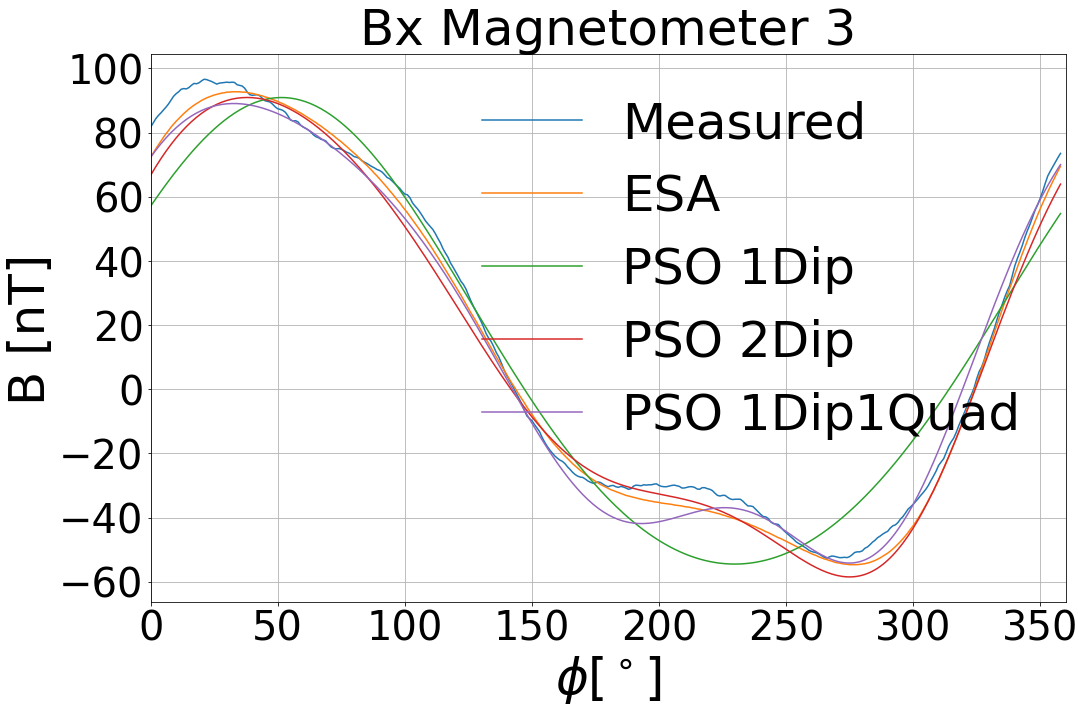

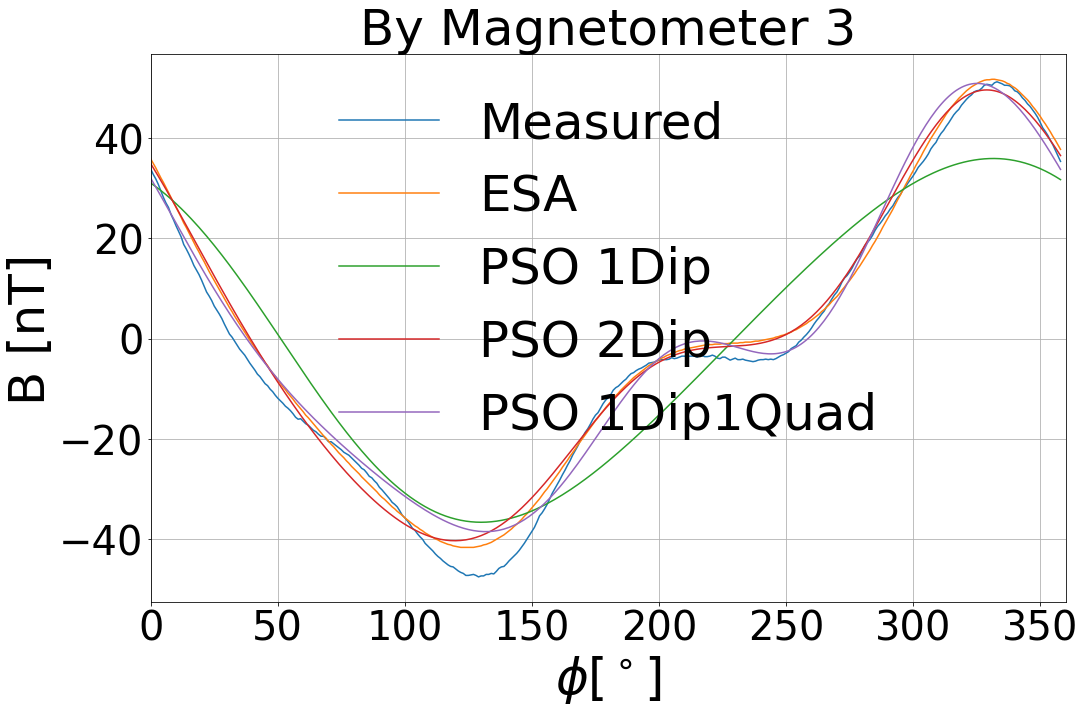

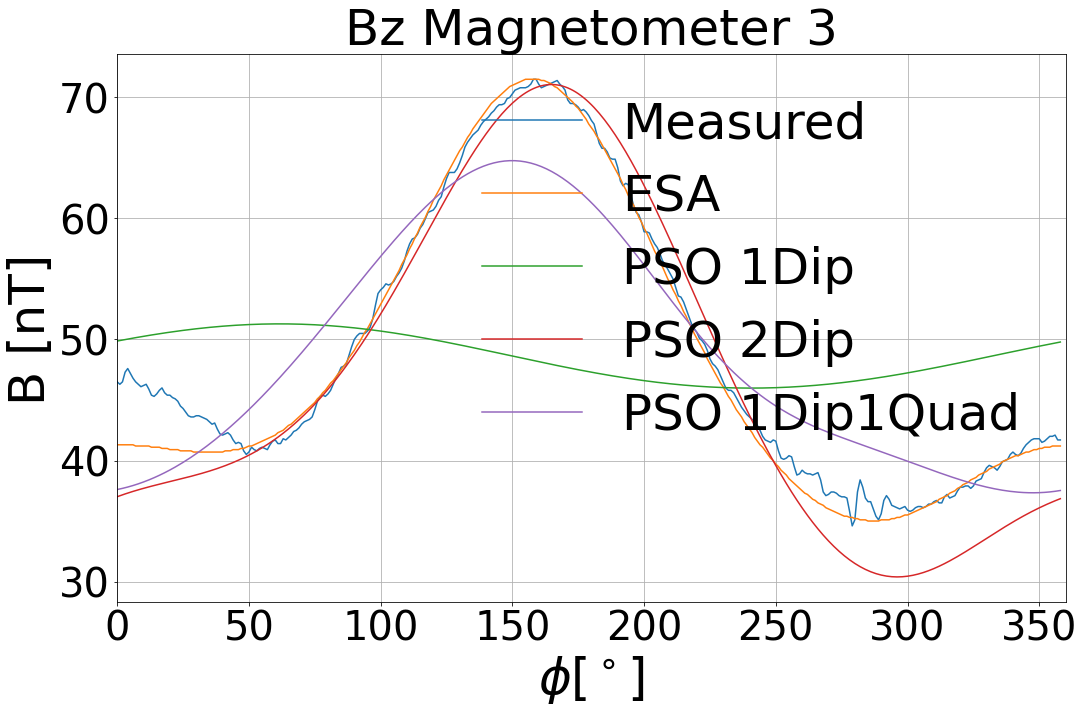

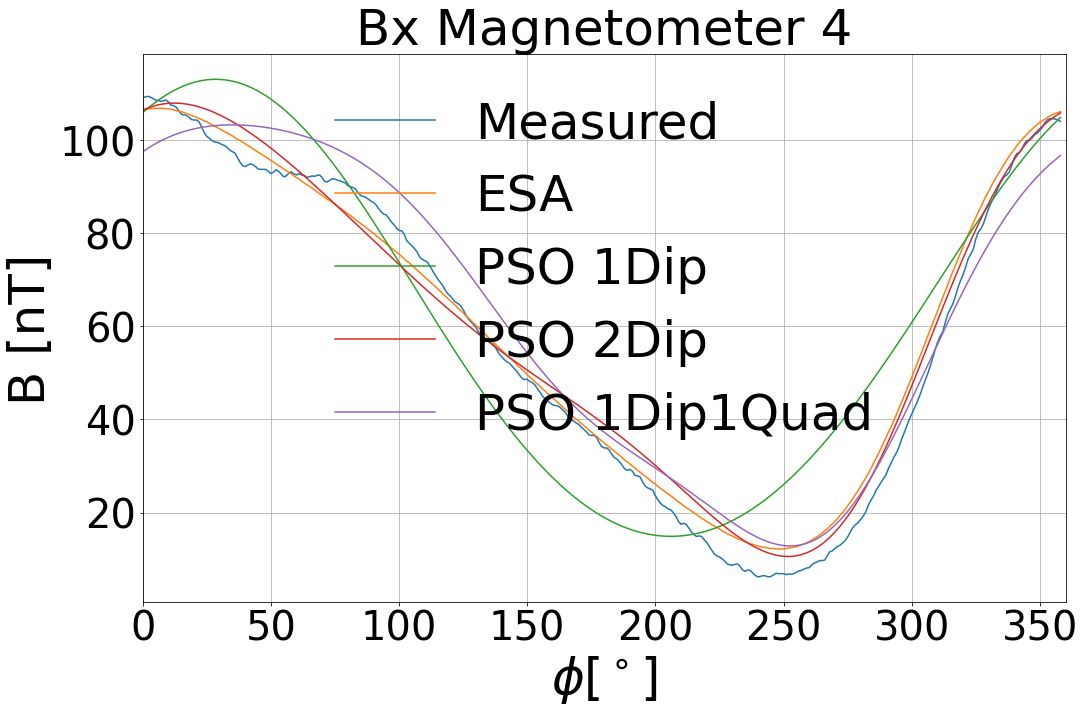

In [58]:
w=15
h=10
ts=40
ls=50
lw=5


#####
f = plt.figure()
f.set_figwidth(w)
f.set_figheight(h)

plt.title('Bx Magnetometer 2',fontsize=ls)

plt.plot(phi[0:359], Bx_meas[0][0:359], '-', label='Measured')
plt.plot(phi[0:359], Bx_ESA[0][0:359], '-', label='ESA')
if mode=='Compare':
    plt.plot(phi[0:359], Bx_PSO[0][0][0:359], '-', label='PSO 1Dip')
    plt.plot(phi[0:359], Bx_PSO[1][0][0:359], '-', label='PSO 2Dip')
    plt.plot(phi[0:359], Bx_PSO[2][0][0:359], '-', label='PSO 1Dip1Quad')
    
else:
    plt.plot(phi[0:359], Bx_PSO[0][0:359], '-', label='PSO '+mode)


plt.xlabel('$\phi [^\circ]$',fontsize=ls)
plt.ylabel('B [nT]',fontsize=ls)
plt.xticks(fontsize=ts)
plt.yticks(fontsize=ts)
plt.tight_layout()
plt.xlim([0,360])
leg=plt.legend(frameon=False,fontsize=ls)
plt.grid()

plt.show()
#####
f = plt.figure()
f.set_figwidth(w)
f.set_figheight(h)

plt.title('By Magnetometer 2',fontsize=ls)

plt.plot(phi[0:359], By_meas[0][0:359], '-', label='Measured')
plt.plot(phi[0:359], By_ESA[0][0:359], '-', label='ESA')
if mode=='Compare':
    plt.plot(phi[0:359], By_PSO[0][0][0:359], '-', label='PSO 1Dip')
    plt.plot(phi[0:359], By_PSO[1][0][0:359], '-', label='PSO 2Dip')
    plt.plot(phi[0:359], By_PSO[2][0][0:359], '-', label='PSO 1Dip1Quad')
    
else:
    plt.plot(phi[0:359], By_PSO[0][0:359], '-', label='PSO '+mode)



plt.xlabel('$\phi [^\circ]$',fontsize=ls)
plt.ylabel('B [nT]',fontsize=ls)
plt.xticks(fontsize=ts)
plt.yticks(fontsize=ts)
plt.tight_layout()
plt.xlim([0,360])
leg=plt.legend(frameon=False,fontsize=ls)
plt.grid()

plt.show()
#####
f = plt.figure()
f.set_figwidth(w)
f.set_figheight(h)

plt.title('Bz Magnetometer 2',fontsize=ls)

plt.plot(phi[0:359], Bz_meas[0][0:359], '-', label='Measured')
plt.plot(phi[0:359], Bz_ESA[0][0:359], '-', label='ESA')
if mode=='Compare':
    plt.plot(phi[0:359], Bz_PSO[0][0][0:359], '-', label='PSO 1Dip')
    plt.plot(phi[0:359], Bz_PSO[1][0][0:359], '-', label='PSO 2Dip')
    plt.plot(phi[0:359], Bz_PSO[2][0][0:359], '-', label='PSO 1Dip1Quad')
    
else:
    plt.plot(phi[0:359], Bz_PSO[0][0:359], '-', label='PSO '+mode)


plt.xlabel('$\phi [^\circ]$',fontsize=ls)
plt.ylabel('B [nT]',fontsize=ls)
plt.xticks(fontsize=ts)
plt.yticks(fontsize=ts)
plt.tight_layout()
plt.xlim([0,360])
leg=plt.legend(frameon=False,fontsize=ls)
plt.grid()

plt.show()
#####
#####
f = plt.figure()
f.set_figwidth(w)
f.set_figheight(h)

plt.title('Bx Magnetometer 3',fontsize=ls)

plt.plot(phi[0:359], Bx_meas[1][0:359], '-', label='Measured')
plt.plot(phi[0:359], Bx_ESA[1][0:359], '-', label='ESA')
if mode=='Compare':
    plt.plot(phi[0:359], Bx_PSO[0][1][0:359], '-', label='PSO 1Dip')
    plt.plot(phi[0:359], Bx_PSO[1][1][0:359], '-', label='PSO 2Dip')
    plt.plot(phi[0:359], Bx_PSO[2][1][0:359], '-', label='PSO 1Dip1Quad')
    
else:
    plt.plot(phi[0:359], Bx_PSO[1][0:359], '-', label='PSO '+mode)


plt.xlabel('$\phi [^\circ]$',fontsize=ls)
plt.ylabel('B [nT]',fontsize=ls)
plt.xticks(fontsize=ts)
plt.yticks(fontsize=ts)
plt.tight_layout()
plt.xlim([0,360])
leg=plt.legend(frameon=False,fontsize=ls)
plt.grid()

plt.show()
#####
f = plt.figure()
f.set_figwidth(w)
f.set_figheight(h)

plt.title('By Magnetometer 3',fontsize=ls)

plt.plot(phi[0:359], By_meas[1][0:359], '-', label='Measured')
plt.plot(phi[0:359], By_ESA[1][0:359], '-', label='ESA')
if mode=='Compare':
    plt.plot(phi[0:359], By_PSO[0][1][0:359], '-', label='PSO 1Dip')
    plt.plot(phi[0:359], By_PSO[1][1][0:359], '-', label='PSO 2Dip')
    plt.plot(phi[0:359], By_PSO[2][1][0:359], '-', label='PSO 1Dip1Quad')
    
else:
    plt.plot(phi[0:359], By_PSO[1][0:359], '-', label='PSO '+mode)



plt.xlabel('$\phi [^\circ]$',fontsize=ls)
plt.ylabel('B [nT]',fontsize=ls)
plt.xticks(fontsize=ts)
plt.yticks(fontsize=ts)
plt.tight_layout()
plt.xlim([0,360])
leg=plt.legend(frameon=False,fontsize=ls)
plt.grid()

plt.show()
#####
f = plt.figure()
f.set_figwidth(w)
f.set_figheight(h)

plt.title('Bz Magnetometer 3',fontsize=ls)

plt.plot(phi[0:359], Bz_meas[1][0:359], '-', label='Measured')
plt.plot(phi[0:359], Bz_ESA[1][0:359], '-', label='ESA')
if mode=='Compare':
    plt.plot(phi[0:359], Bz_PSO[0][1][0:359], '-', label='PSO 1Dip')
    plt.plot(phi[0:359], Bz_PSO[1][1][0:359], '-', label='PSO 2Dip')
    plt.plot(phi[0:359], Bz_PSO[2][1][0:359], '-', label='PSO 1Dip1Quad')
    
else:
    plt.plot(phi[0:359], Bz_PSO[1][0:359], '-', label='PSO '+mode)



plt.xlabel('$\phi [^\circ]$',fontsize=ls)
plt.ylabel('B [nT]',fontsize=ls)
plt.xticks(fontsize=ts)
plt.yticks(fontsize=ts)
plt.tight_layout()
plt.xlim([0,360])
leg=plt.legend(frameon=False,fontsize=ls)
plt.grid()

plt.show()
#####
#####
f = plt.figure()
f.set_figwidth(w)
f.set_figheight(h)

plt.title('Bx Magnetometer 4',fontsize=ls)

plt.plot(phi[0:359], Bx_meas[2][0:359], '-', label='Measured')
plt.plot(phi[0:359], Bx_ESA[2][0:359], '-', label='ESA')
if mode=='Compare':
    plt.plot(phi[0:359], Bx_PSO[0][2][0:359], '-', label='PSO 1Dip')
    plt.plot(phi[0:359], Bx_PSO[1][2][0:359], '-', label='PSO 2Dip')
    plt.plot(phi[0:359], Bx_PSO[2][2][0:359], '-', label='PSO 1Dip1Quad')
    
else:
    plt.plot(phi[0:359], Bx_PSO[2][0:359], '-', label='PSO '+mode)


plt.xlabel('$\phi [^\circ]$',fontsize=ls)
plt.ylabel('B [nT]',fontsize=ls)
plt.xticks(fontsize=ts)
plt.yticks(fontsize=ts)
plt.tight_layout()
plt.xlim([0,360])
leg=plt.legend(frameon=False,fontsize=ls)
plt.grid()

plt.show()
#####
f = plt.figure()
f.set_figwidth(w)
f.set_figheight(h)

plt.title('By Magnetometer 4',fontsize=ls)

plt.plot(phi[0:359], By_meas[2][0:359], '-', label='Measured')
plt.plot(phi[0:359], By_ESA[2][0:359], '-', label='ESA')
if mode=='Compare':
    plt.plot(phi[0:359], By_PSO[0][2][0:359], '-', label='PSO 1Dip')
    plt.plot(phi[0:359], By_PSO[1][2][0:359], '-', label='PSO 2Dip')
    plt.plot(phi[0:359], By_PSO[2][2][0:359], '-', label='PSO 1Dip1Quad')
    
else:
    plt.plot(phi[0:359], By_PSO[2][0:359], '-', label='PSO '+mode)



plt.xlabel('$\phi [^\circ]$',fontsize=ls)
plt.ylabel('B [nT]',fontsize=ls)
plt.xticks(fontsize=ts)
plt.yticks(fontsize=ts)
plt.tight_layout()
plt.xlim([0,360])
leg=plt.legend(frameon=False,fontsize=ls)
plt.grid()

plt.show()
#####
f = plt.figure()
f.set_figwidth(w)
f.set_figheight(h)

plt.title('Bz Magnetometer 4',fontsize=ls)

plt.plot(phi[0:359], Bz_meas[2][0:359], '-', label='Measured')
plt.plot(phi[0:359], Bz_ESA[2][0:359], '-', label='ESA')
if mode=='Compare':
    plt.plot(phi[0:359], Bz_PSO[0][2][0:359], '-', label='PSO 1Dip')
    plt.plot(phi[0:359], Bz_PSO[1][2][0:359], '-', label='PSO 2Dip')
    plt.plot(phi[0:359], Bz_PSO[2][2][0:359], '-', label='PSO 1Dip1Quad')
    
else:
    plt.plot(phi[0:359], Bz_PSO[2][0:359], '-', label='PSO '+mode)


plt.xlabel('$\phi [^\circ]$',fontsize=ls)
plt.ylabel('B [nT]',fontsize=ls)
plt.xticks(fontsize=ts)
plt.yticks(fontsize=ts)
plt.tight_layout()
plt.xlim([0,360])
leg=plt.legend(frameon=False,fontsize=ls)
plt.grid()

plt.show()
#####

In [62]:
Bx_CROSS,By_CROSS,Bz_CROSS=Bxyz_1Dip1Quad(-4.652935514748406,-0.508479001640356, 2.913672467890691,
 2.4315199670226253, 9.117171215721005, -9.780917662241205, 9.64228011157063,
 1.9983152430098312, -1.3925937419403636, 0.39197985322586004,
 3.204200734107974, 290.71857697755644, 90.0)

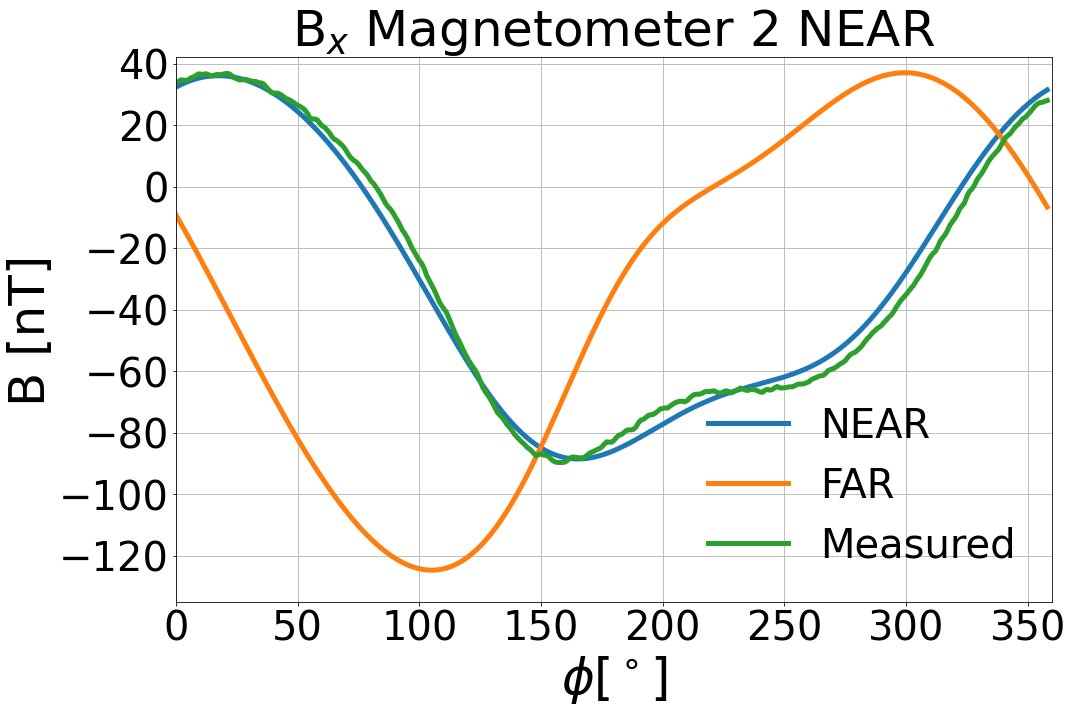

In [66]:
w=15
h=10
ts=40
ls=50
lw=5


#####
f = plt.figure()
f.set_figwidth(w)
f.set_figheight(h)

plt.title('B$_x$ Magnetometer 2 NEAR',fontsize=ls)


plt.plot(phi[0:359], Bx_PSO[1][0][0:359], '-', label='NEAR',lw=lw)
plt.plot(phi[0:359], Bx_CROSS[0][0:359], '-', label='FAR',lw=lw)
plt.plot(phi[0:359], Bx_meas[0][0:359], '-', label='Measured',lw=lw)


plt.xlabel('$\phi [^\circ]$',fontsize=ls)
plt.ylabel('B [nT]',fontsize=ls)
plt.xticks(fontsize=ts)
plt.yticks(fontsize=ts)
plt.tight_layout()
plt.xlim([0,360])
plt.ylim([-135,42])
leg=plt.legend(frameon=False,fontsize=ts)
plt.grid()
plt.tight_layout()
plt.savefig('IMAGES/Bx_Filter_Mag2_NEAR_COMP.png', format='png')
plt.show()
#####

In [1]:
%run -i CountLines.py PSO_VICTOR_25.ipynb

CODE LINES
1424
